In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [2]:
df = pd.read_csv('homework_6.csv')

In [3]:
df

,speed,pressure,distance,Yi1,Yi2,Yi3,Yi_bar,Si
0,-1,-1,-1,34,10,28,24.0,12.5
1,0,-1,-1,115,116,130,120.3,8.4
2,1,-1,-1,192,186,263,213.7,42.8
3,-1,0,-1,82,88,88,86.0,3.7
4,0,0,-1,44,178,188,136.7,80.4
5,1,0,-1,322,350,350,340.7,16.2
6,-1,1,-1,141,110,86,112.3,27.6
7,0,1,-1,259,251,259,256.3,4.6
8,1,1,-1,290,280,245,271.7,23.6
9,-1,-1,0,81,81,81,81.0,0.0


In [6]:
model1 = sm.OLS(df['Yi1'],df[['speed','pressure','distance']]).fit()
model2 = sm.OLS(df['Yi2'],df[['speed','pressure','distance']]).fit()
model3 = sm.OLS(df['Yi3'],df[['speed','pressure','distance']]).fit()

In [7]:
X = df[['speed','pressure','distance']]
residuals1 = model1.resid
residuals2 = model2.resid
residuals3 = model3.resid
predictions1 = model1.predict(X)
predictions2 = model2.predict(X)
predictions3 = model3.predict(X)

In [8]:
def resid_analysis(model, predictions, residuals):
    #construct a normal probability plot of the residuals

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

    # First plot: Normal Probability Plot of Residuals.
    stats.probplot(model.resid, dist="norm", plot=axs[0])
    axs[0].set_title('Normal Probability Plot of Residuals')
    axs[0].set_xlabel('Theoretical Quantiles')
    axs[0].set_ylabel('Ordered Values')

    # Second plot: Residuals vs. Predicted Values.
    axs[1].scatter(predictions, residuals, edgecolor='k', facecolor='grey', alpha=0.7)
    axs[1].hlines(y=0, xmin=min(predictions), xmax=max(predictions), color='red', linestyle='--')
    axs[1].set_title('Residuals vs. Predicted Values')
    axs[1].set_xlabel('Predicted Values')
    axs[1].set_ylabel('Residuals')

    # Improve layout and show plot.
    plt.tight_layout()
    plt.show()

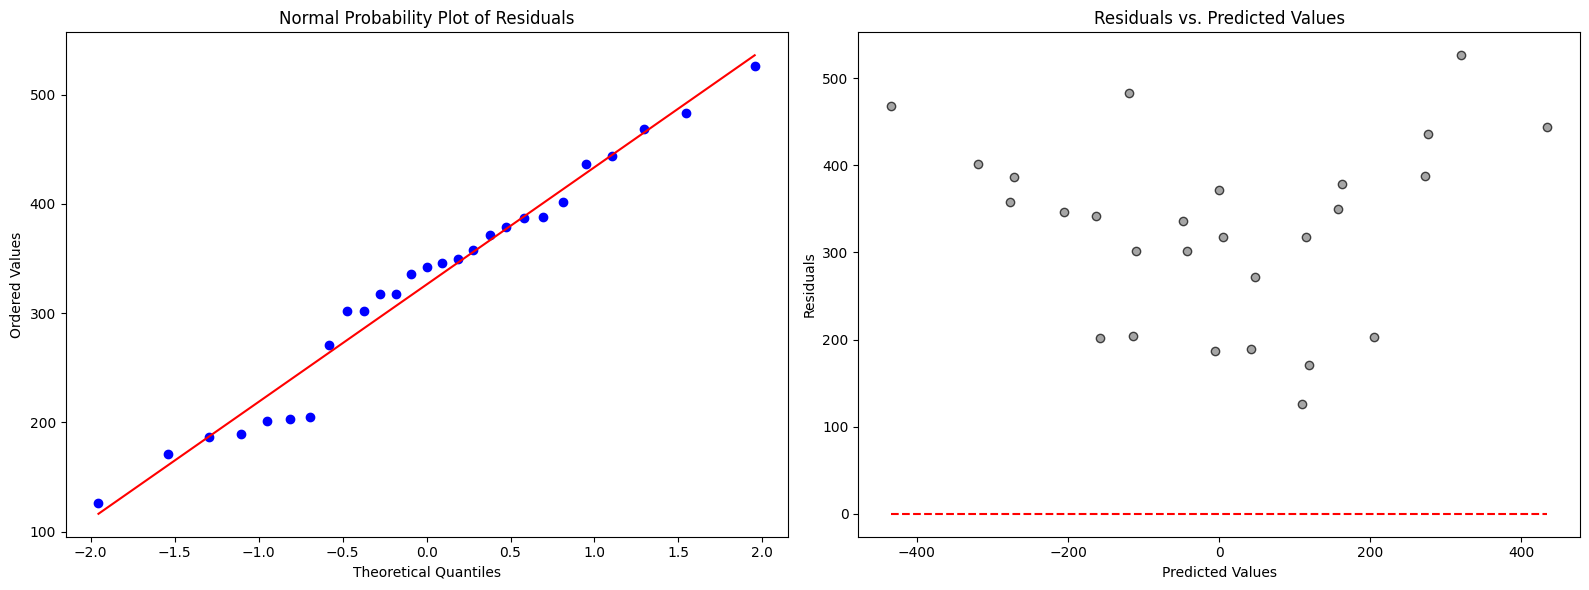

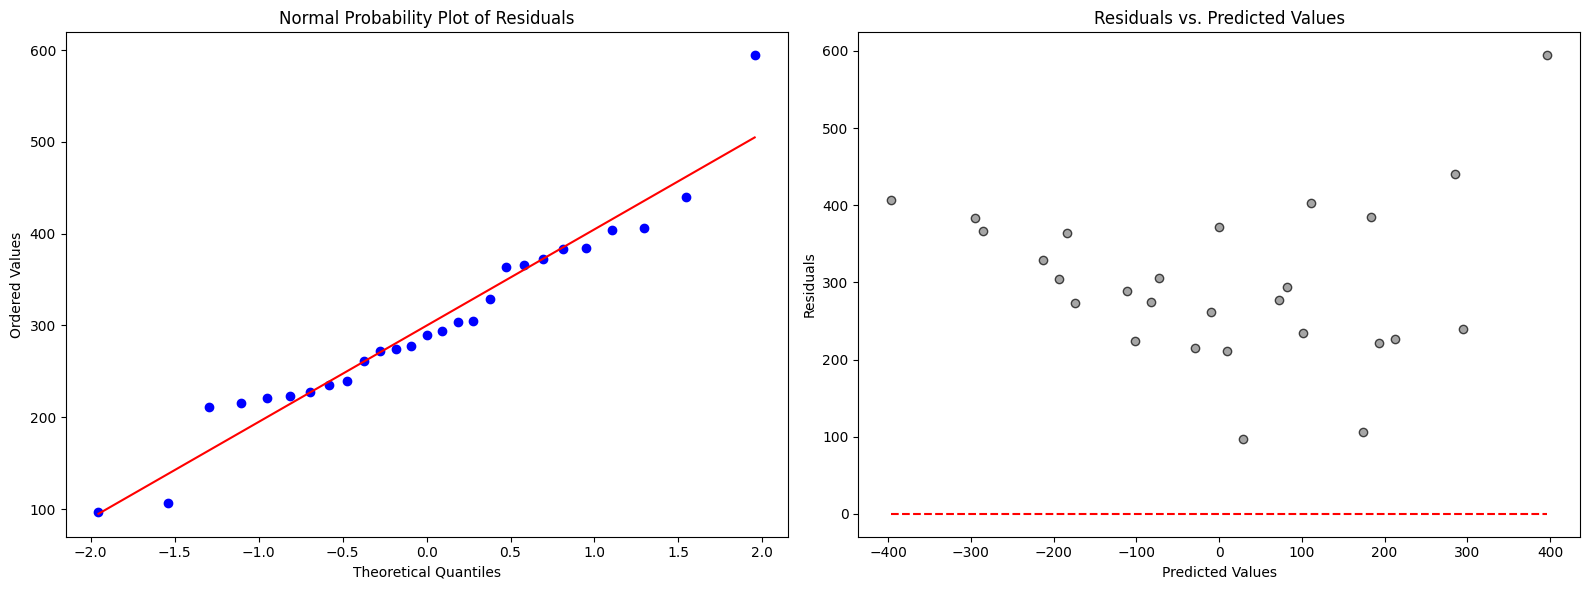

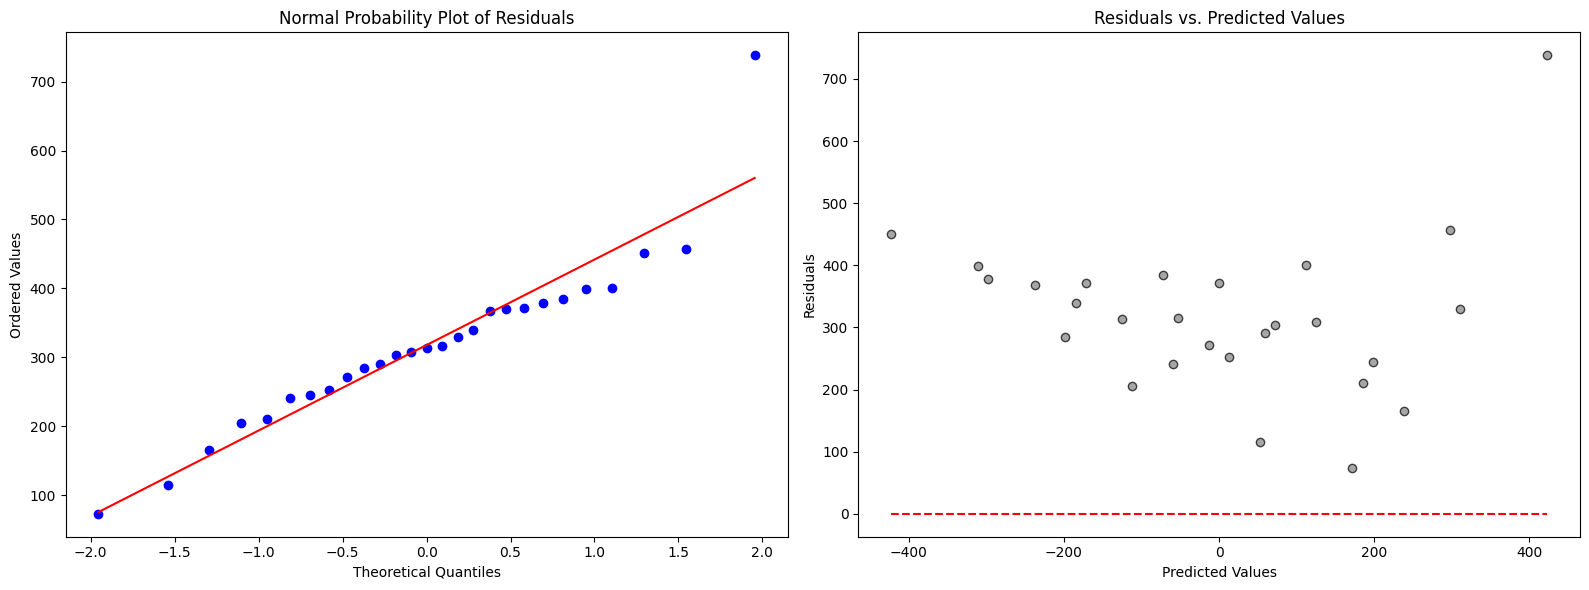

In [9]:
resid_analysis(model1, predictions1, residuals1)
resid_analysis(model2, predictions2, residuals2)
resid_analysis(model3, predictions3, residuals3)